In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/HR-Employee-Attrition.csv')
print("Data Overview:")
print(df.head())
print(df.info())


Data Overview:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOption

In [67]:
df.shape

(1470, 35)

In [68]:
df.size


51450

In [69]:
# Check for missing values
print("Missing Values Count:")
print(df.isnull().sum())

Missing Values Count:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole

In [70]:
# Convert categorical data to numeric encoding
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}).fillna(-1).astype(int)


print("Encoded Data Sample:")
print(df.head())

Encoded Data Sample:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction  StandardHours  Stoc

In [71]:
df['Gender']

,Gender
0,1
1,0
2,0
3,1
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [72]:
print(df.columns)
print(df['Gender'].unique())

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
[1 0]


<ipython-input-73-a8fc336f7d4f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=['red', 'black'])  # Specify the colors for the bars


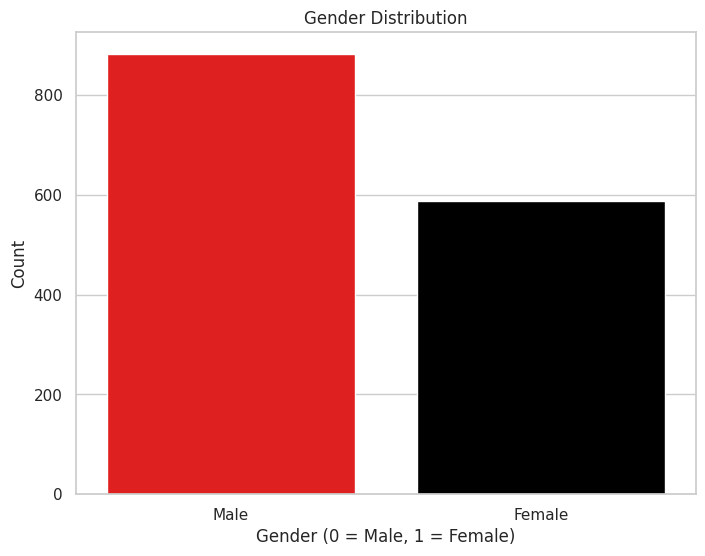

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style='whitegrid')

# Plotting the Gender Distribution with red and black colors
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette=['red', 'black'])  # Specify the colors for the bars
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])  # Adding labels to x-axis for clarity
plt.show()

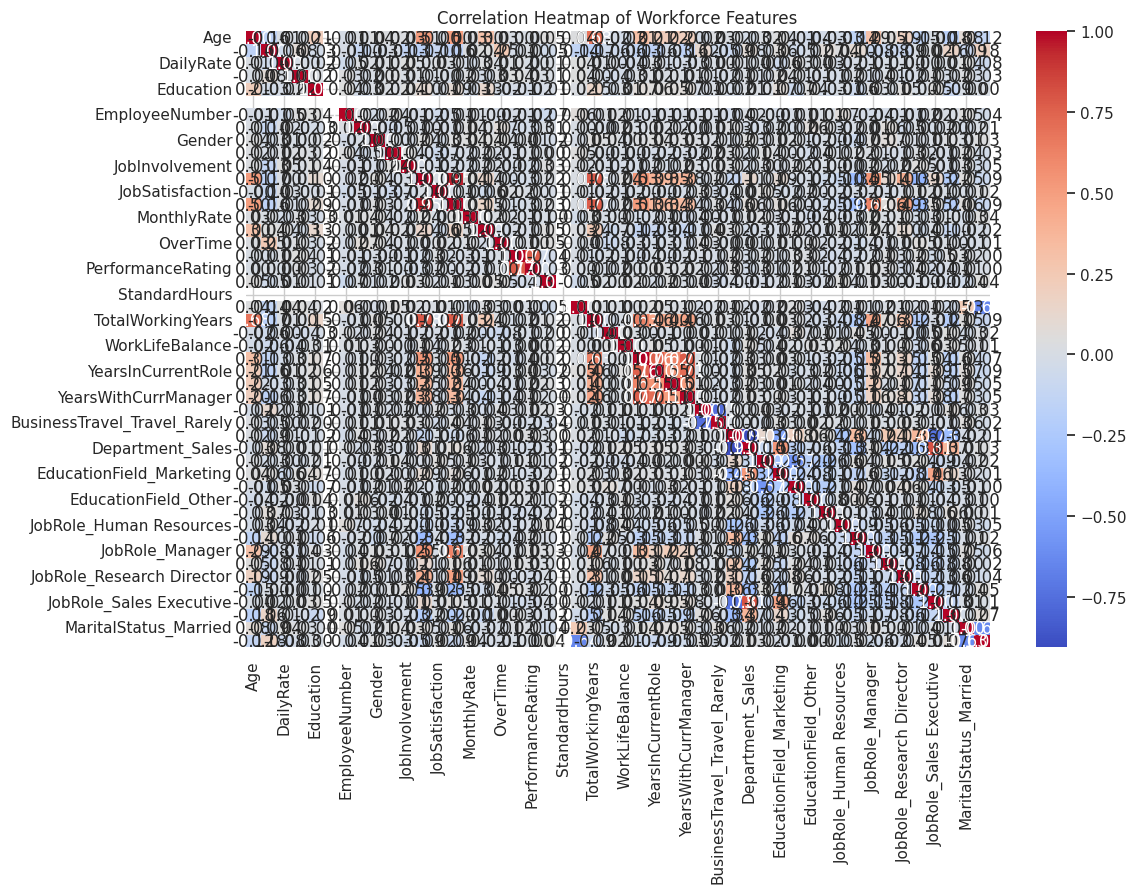

In [74]:

# Assuming 'df' is your DataFrame

# Get a list of object (string) columns
object_cols = df.select_dtypes(include=['object']).columns

# Convert object columns to numerical using one-hot encoding
for col in object_cols:
    # If the column contains only 'Yes' and 'No', map them to 1 and 0
    if set(df[col].unique()) == {'Yes', 'No'}:
        df[col] = df[col].map({'Yes': 1, 'No': 0}).fillna(-1).astype(int)
    else:
        # For other object columns, use one-hot encoding
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)  # drop_first to avoid multicollinearity
        df = df.drop(col, axis=1)  # Drop the original column
        df = pd.concat([df, one_hot], axis=1)  # Add the one-hot encoded columns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Workforce Features')
plt.show()

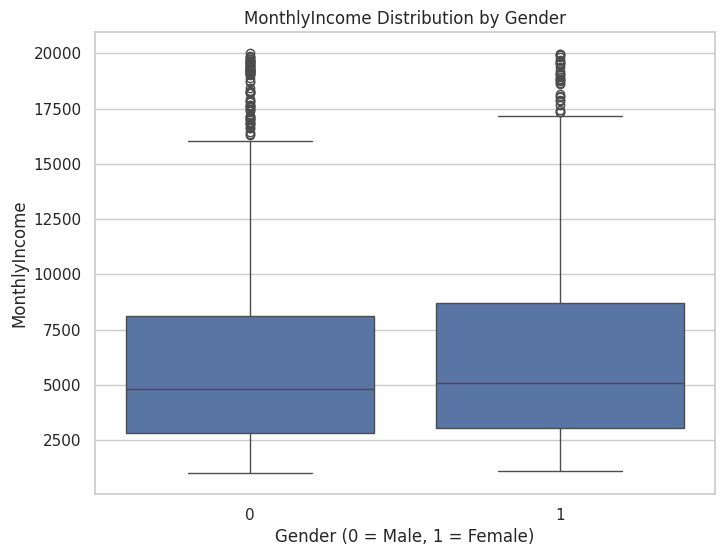

In [75]:
#Salary Distribution by Gender
if 'MonthlyIncome' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y='MonthlyIncome', data=df)
    plt.title('MonthlyIncome Distribution by Gender')
    plt.xlabel('Gender (0 = Male, 1 = Female)')
    plt.ylabel('MonthlyIncome')
    plt.show()

In [76]:
#Gender Pay Gap
if 'MonthlyIncome' in df.columns:
    gender_pay_gap = df.groupby('Gender')['MonthlyIncome'].mean()
    print("Average MonthlyIncome by Gender:")
    print(gender_pay_gap)



Average MonthlyIncome by Gender:
Gender
0    6380.507937
1    6686.566327
Name: MonthlyIncome, dtype: float64


<ipython-input-77-afefdf56e9e0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_diversity.index, y=gender_diversity.values, palette='coolwarm', ax=ax[0])
<ipython-input-77-afefdf56e9e0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=JobInvolvement_diversity.index, y=JobInvolvement_diversity.values, palette='viridis', ax=ax[1])


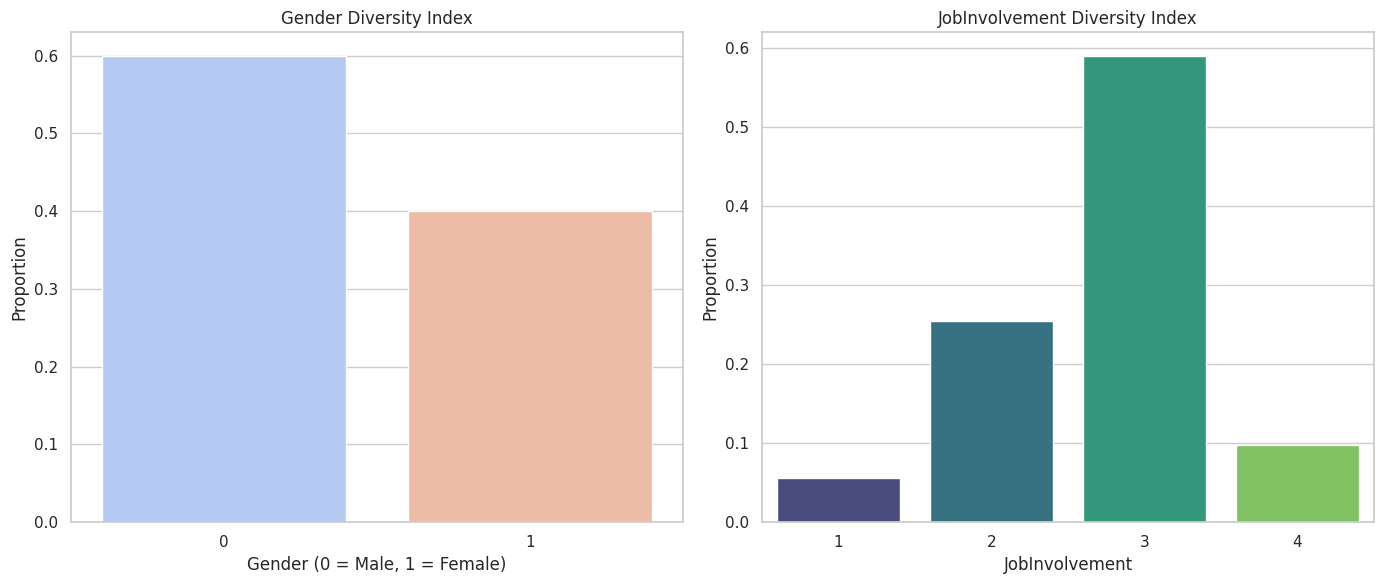

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Diversity Indices (Normalizing values)
gender_diversity = df['Gender'].value_counts(normalize=True)
JobInvolvement_diversity = df['JobInvolvement'].value_counts(normalize=True)

# Visualize Diversity Indices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gender Diversity Index Plot
sns.barplot(x=gender_diversity.index, y=gender_diversity.values, palette='coolwarm', ax=ax[0])
ax[0].set_title('Gender Diversity Index')
ax[0].set_xlabel('Gender (0 = Male, 1 = Female)')
ax[0].set_ylabel('Proportion')

# JobInvolvement Diversity Index Plot
sns.barplot(x=JobInvolvement_diversity.index, y=JobInvolvement_diversity.values, palette='viridis', ax=ax[1])
ax[1].set_title('JobInvolvement Diversity Index')
ax[1].set_xlabel('JobInvolvement')
ax[1].set_ylabel('Proportion')

# Adjust layout to make it tight
plt.tight_layout()
plt.show()
